# Interactive usage

This is a tutorial for visualizing datasets in jupyter env. And more detailed explanation of parameters, please check our documentation https://sashimi.readthedocs.io/en/latest/interactive



In [1]:
# before import sashimi please swith matplotlib to inline mode|
%matplotlib inline

import matplotlib   # used to change prevew image size

from trackplot.plot import Plot

The interactive API could be used as normal functions or calling as process chain.

Here is an example

## 1. init plot

First, we create a Plot Object for receiving the datasets and  parameters.


In [2]:
plot = Plot()

## 2. set reference

Next, we added the reference file as first track into the plot object. 

In [3]:
plot.set_reference(
    "../example/example.sorted.gtf.gz",                                             # path to gtf file
    add_domain=False,                                                                # whether add domain information into reference track
    interval="../example/PolyASite.chr1.atlas.clusters.2.0.GRCh38.96.bed.gz",       # path to list of interval files in bed format, 1st column is path to file, 2nd column is the label
    interval_label="polyA",                                                         # the label of added interval
    show_gene=True,                                                                 # show gene id
    color="pink"                                                                    # the color of exons
)

2023-02-15 16:13:33.587 | INFO     | sashimi.plot:set_reference:362 - set reference file to ../example/example.sorted.gtf.gz
2023-02-15 16:13:33.590 | INFO     | sashimi.file.Reference:index_gtf:315 - Create index for ../example/example.sorted.gtf.gz
2023-02-15 16:13:33.591 | ERROR    | sashimi.file.Reference:index_gtf:324 - building of index for ../example/example.sorted.gtf.gz failed
2023-02-15 16:13:33.591 | ERROR    | sashimi.file.Reference:index_gtf:325 - Guess gtf needs to be sorted


Here is other parameters in `set_reference`:

    - font_size: the size of transcript id, name

    - transcripts: the list of name or ids of transcripts to draw

    - remove_empty_transcripts: whether to remove transcripts without any exons

    - show_gene: whether to show gene name/id

    - show_id: show gene id or gene name

    - reverse_minus: whether to remove strand of transcripts

    - theme: the theme of transcript

    - exon_width: the height of exons

    - show_exon_id: whether to show exon id



## 3. setup plotting parameters

We first initiate the region of interest,  


In [4]:
plot.set_region(
    chromosome="chr1",                                                                        # chromosome
    start=1270656,                                                                            # start site
    end=1284730,                                                                              # end site
    strand="+"                                                                                # strand
)


2023-02-15 16:13:35.651 | INFO     | sashimi.plot:set_region:213 - set region to chr1:1270656-1284730:+


#### Add a custom interval information, like PolyAsite, miRNA binding site 

In [5]:
plot.add_interval(
    interval="../example/PolyASite.chr1.atlas.clusters.2.0.GRCh38.96.simple.bed.gz",          # path to list of interval files in bed format, 1st column is path to file, 2nd column is the label
    interval_label="polyAS"                                                                   # the label of added interval
)

#### Add a first density plot track

2023-02-15 16:13:36.421 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:36.428 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:36.433 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:36.434 | INFO     | sashimi.plot:plot:1015 - load data of 1 plots
2023-02-15 16:13:36.981 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=3; n_cols = 1
2023-02-15 16:13:36.982 | INFO     | sashimi.plot:plot:1055 - init graph_coords


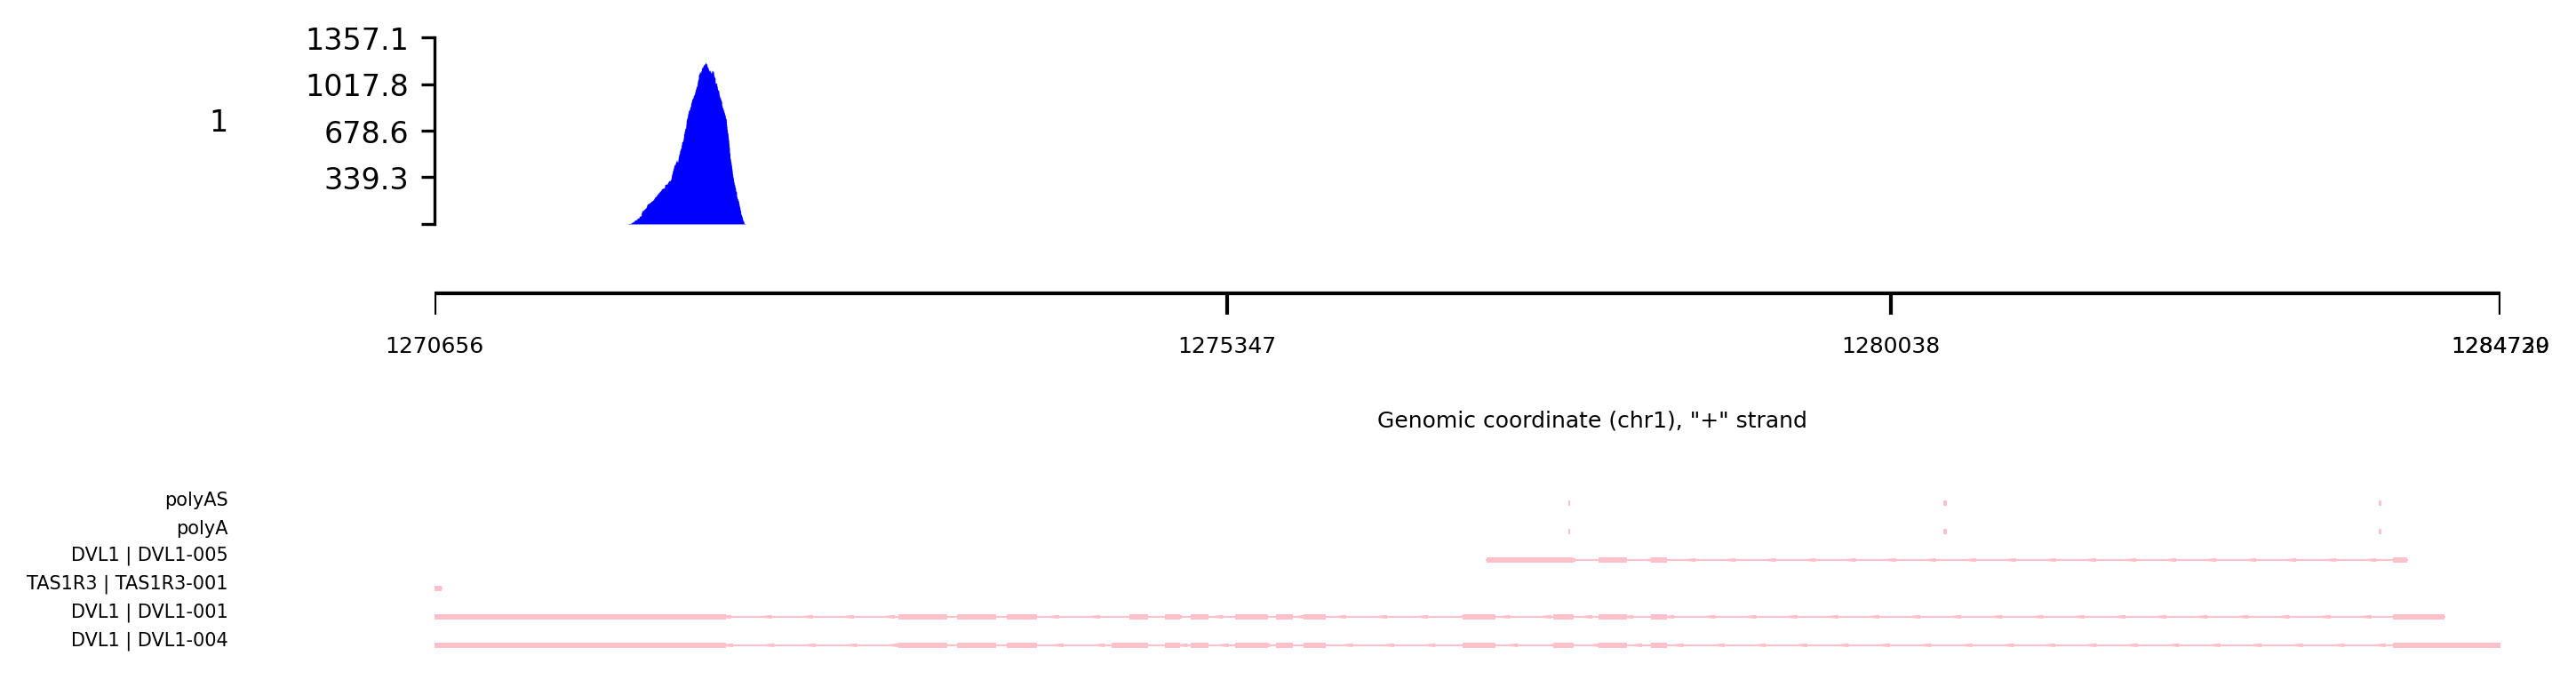

In [6]:
matplotlib.rcParams['figure.figsize'] = [8, 4]                                                # set the proper image size to preview

plot.add_density(
    path="../example/bams/1.bam",                                                             # path to input file
    category="bam",                                                                           # the category of given file
    color="blue",                                                                             # color of this density
    show_site_plot=False                                                                      # whether to show site plot
)

plot.plot(
        width=10,                                                                             # The width of output file, default adjust image width by content 
        height=1,                                                                             # The height of output file, default adjust image height by content
        dpi=300,                                                                              # The resolution of output file
        raster=True,                                                                          # The would convert heatmap and site plot to raster image
        intron_scale=0.5,                                                                     # The scale of intron, for shrinkage of intron
        exon_scale=1,                                                                         # The scale of exon, for shrinkage of exon
        reference_scale=0.25,                                                                 # The size of reference plot in final plot
        stroke_scale=0.25,                                                                    # The size of stroke plot in final image
        same_y=True,                                                                          # Whether different sashimi/line plots shared same y-axis boundaries
        remove_duplicate_umi=False,                                                           # Drop duplicated UMIs by barcode
        threshold=1,                                                                          # Threshold to filter low abundance junctions
        sc_height_ratio={
            "heatmap": .2,                                                                    # The relative height of single cell heatmap plots
            "density": 1                                                                      # The relative height of single cell density plots
        },
        distance_between_label_axis=.1,                                                       # distance between transcript label and transcript line
        included_junctions=None,                                                              # The junction id for including, chr1:1-100
        n_jobs=1,                                                                             # How many cpu to use
        normalize_format='count'                                                              # The normalize format for bam file, default: count. 
    )


User could also add a new track on the same Plot object

2023-02-15 16:13:37.624 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:37.629 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:37.633 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:37.635 | INFO     | sashimi.plot:plot:1015 - load data of 2 plots
2023-02-15 16:13:38.210 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=4; n_cols = 1
2023-02-15 16:13:38.210 | INFO     | sashimi.plot:plot:1055 - init graph_coords


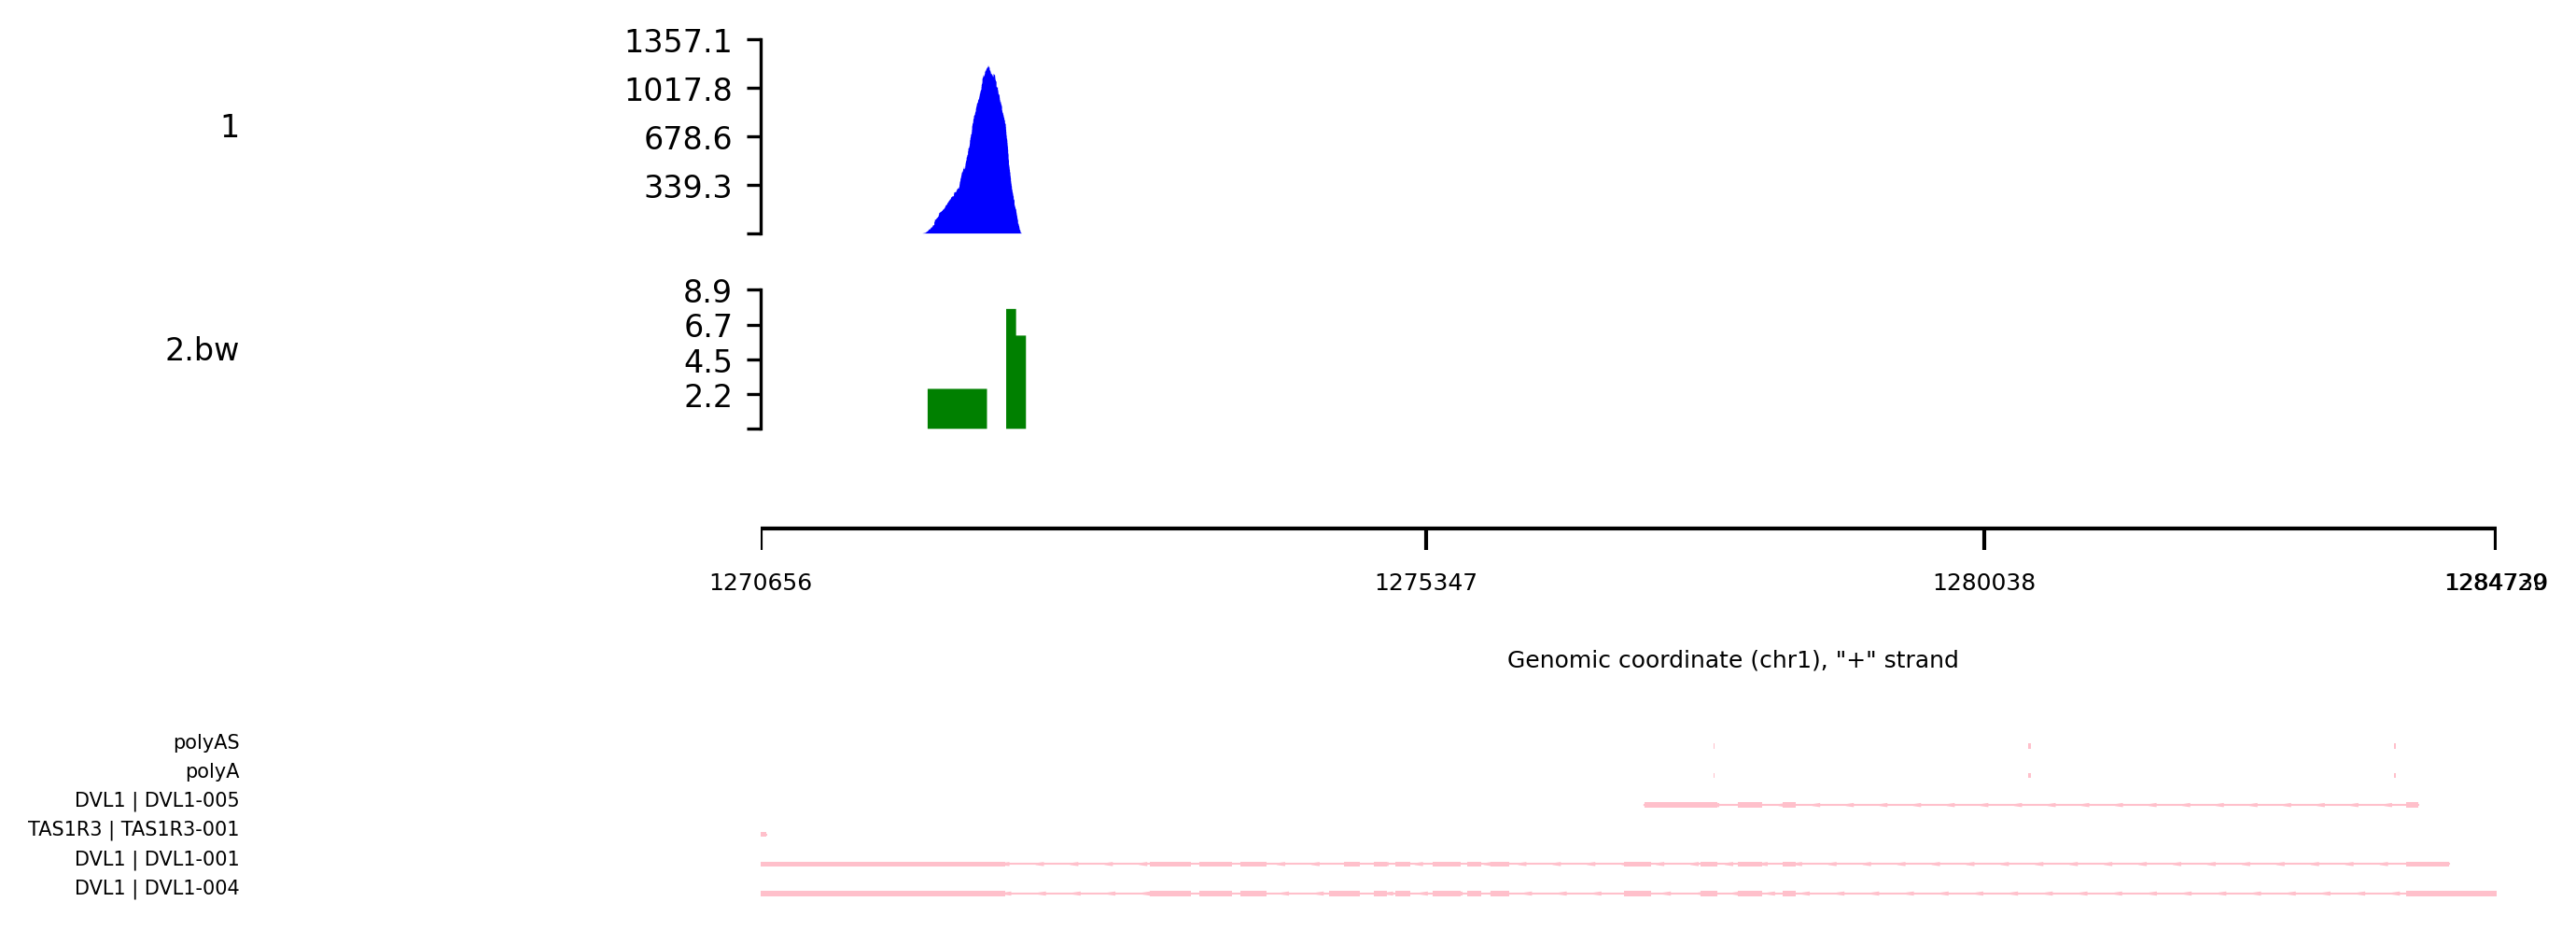

In [7]:
plot.add_density(                                                                             # another density plot
    path="../example/bws/2.bw",
    category="bw",
    color="green"
)
plot.plot(
    threshold = 10
)

#### Add a line plot track

2023-02-15 16:13:38.883 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:38.891 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:38.898 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:38.902 | INFO     | sashimi.plot:plot:1015 - load data of 4 plots
2023-02-15 16:13:40.562 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=6; n_cols = 1
2023-02-15 16:13:40.563 | INFO     | sashimi.plot:plot:1055 - init graph_coords


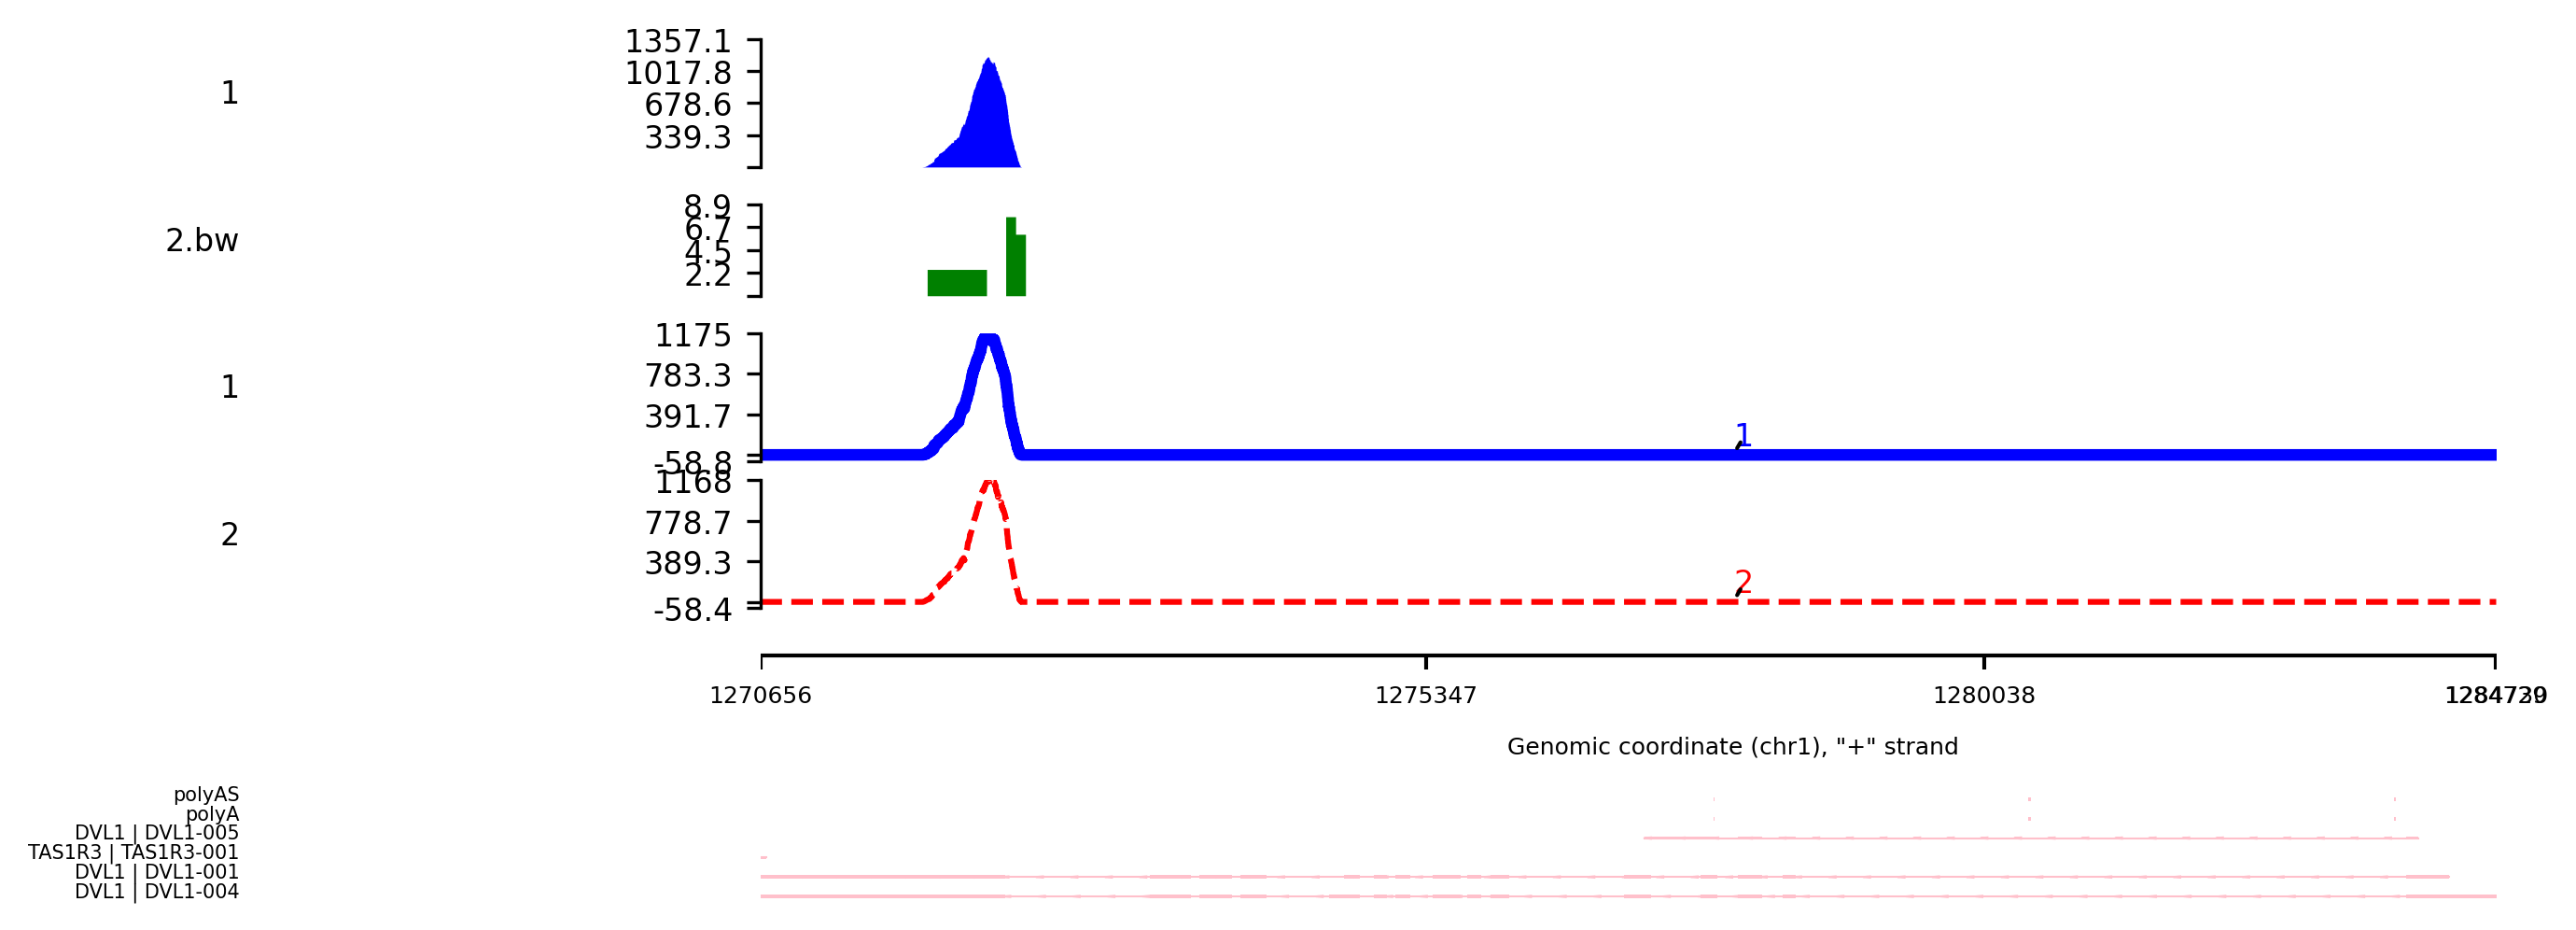

In [8]:
plot.add_line(
    path="../example/bams/1.bam",                                                             # path to input file
    category="bam",                                                                           # the category of given file
    group="1",                                                                                # the group of this line, used to control color etc.
    color="blue",                                                                             # color of this line and other lines belong to group 1
    line_attrs={"lw": 3}                                                                      # additional parameters in dict to control the layout of line
).add_line(                                                                                   # another line
    path="../example/bams/2.bam",
    category="bam",
    group="2",
    color="red",
    line_attrs={"linestyle": "dashed"}                                                        # additional parameters in dict to control the layout of line, for instance this changes the line style
)
plot.plot(
    threshold = 10
)

#### Add a heatmap plot track

2023-02-15 16:13:41.489 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:41.494 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:41.498 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:41.499 | INFO     | sashimi.plot:plot:1015 - load data of 5 plots
2023-02-15 16:13:44.208 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=7; n_cols = 2
2023-02-15 16:13:44.208 | INFO     | sashimi.plot:plot:1055 - init graph_coords
2023-02-15 16:13:44.209 | WARNING  | sashimi.plot:plot:1059 - heatmap require intron_scale = 1


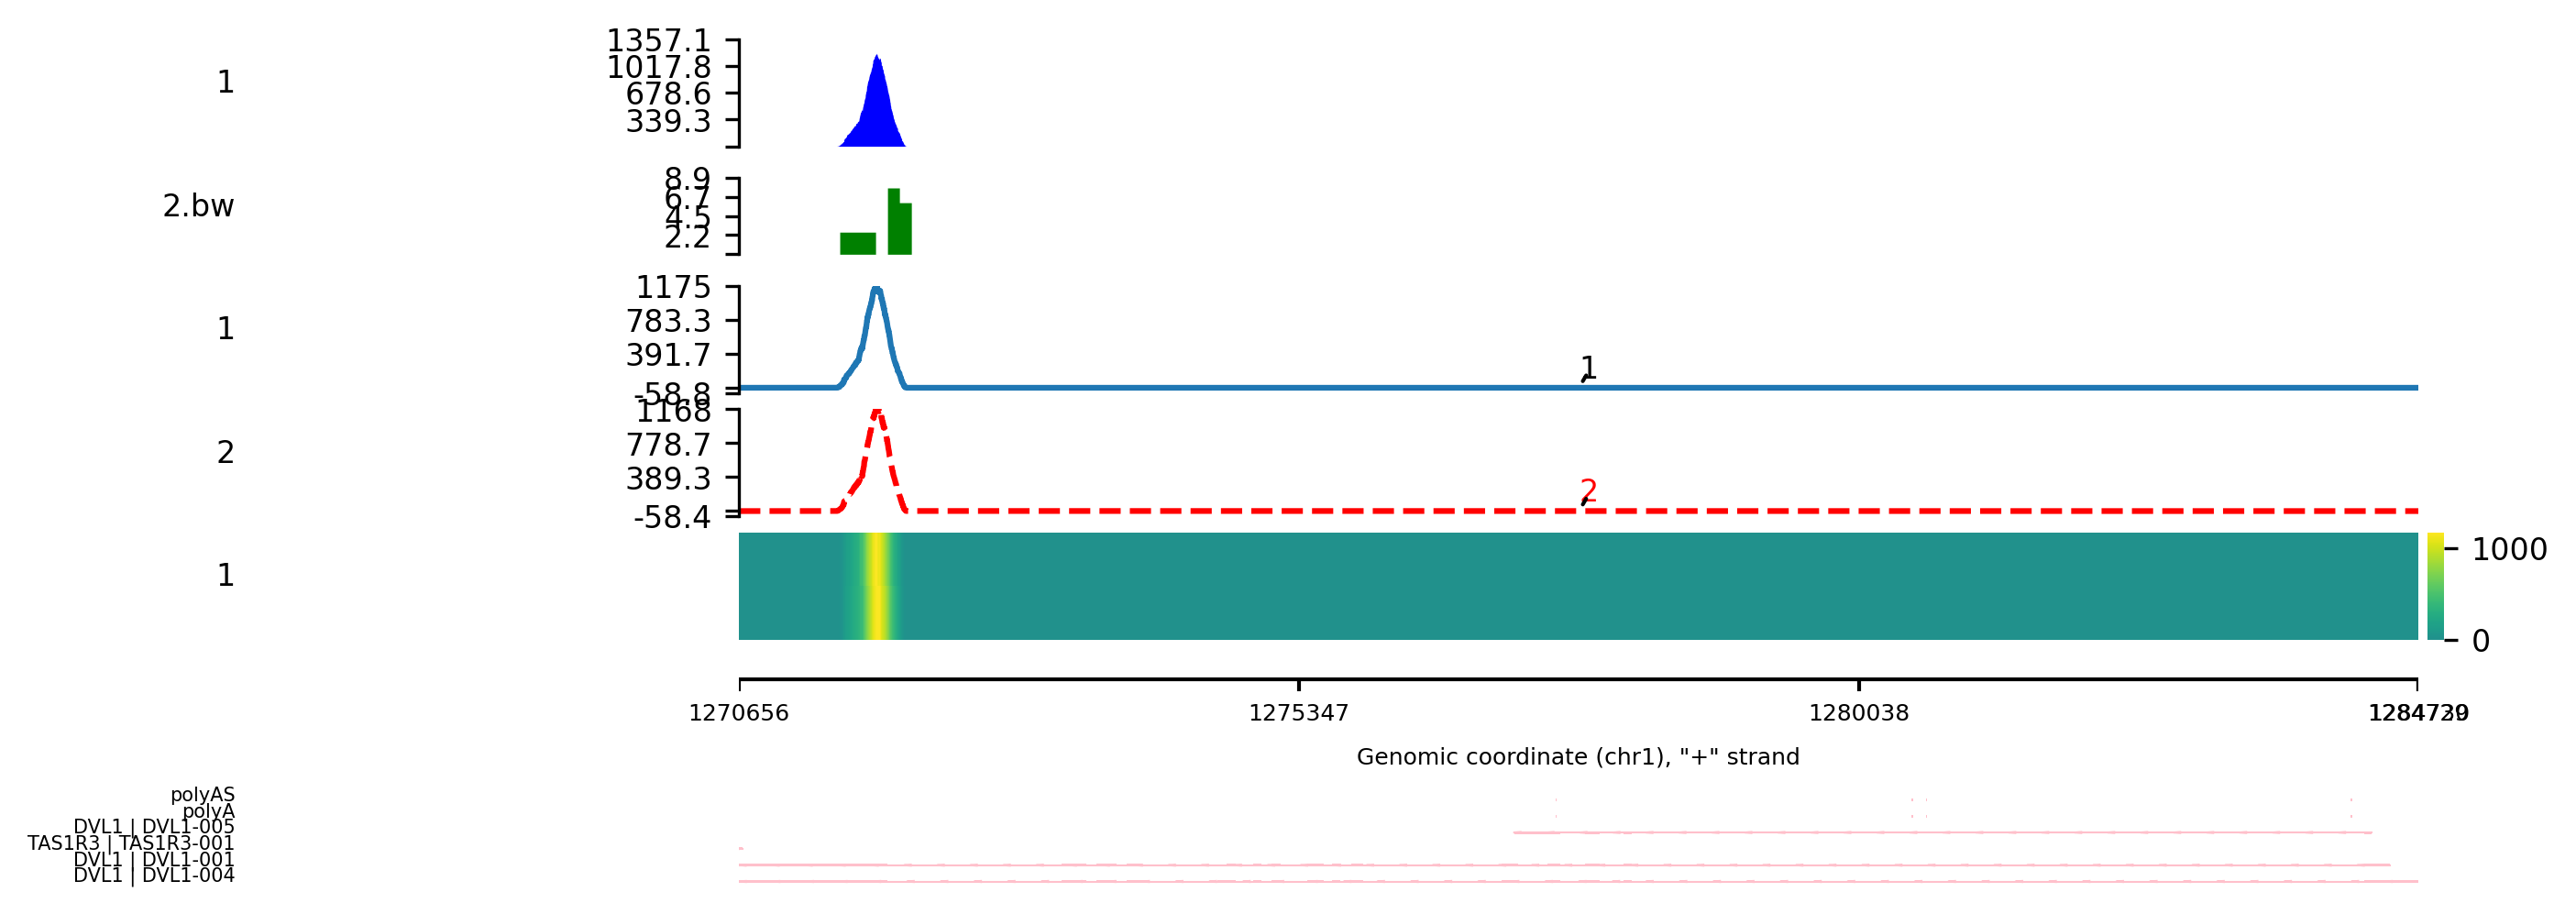

In [9]:
plot.add_heatmap(
    path="../example/bams/1.bam",                                                             # path to input file
    category="bam",                                                                           # the category of given file
    group="1",                                                                                # the group of this file, only files belong to same group will be drawn in same heatmap.
).add_heatmap(                                                                                # another file to heatmap 1
    path="../example/bams/2.bam",
    category="bam",
    group="1"
)
plot.plot(
    threshold=10
)

### Add site annotation

User could add custom vertical line to indicated the polyadenylation site or crispr/cas9 binding site

2023-02-15 16:13:45.481 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:45.486 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:45.490 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:45.491 | INFO     | sashimi.plot:plot:1015 - load data of 5 plots
2023-02-15 16:13:48.123 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=7; n_cols = 2
2023-02-15 16:13:48.124 | INFO     | sashimi.plot:plot:1055 - init graph_coords
2023-02-15 16:13:48.125 | WARNING  | sashimi.plot:plot:1059 - heatmap require intron_scale = 1


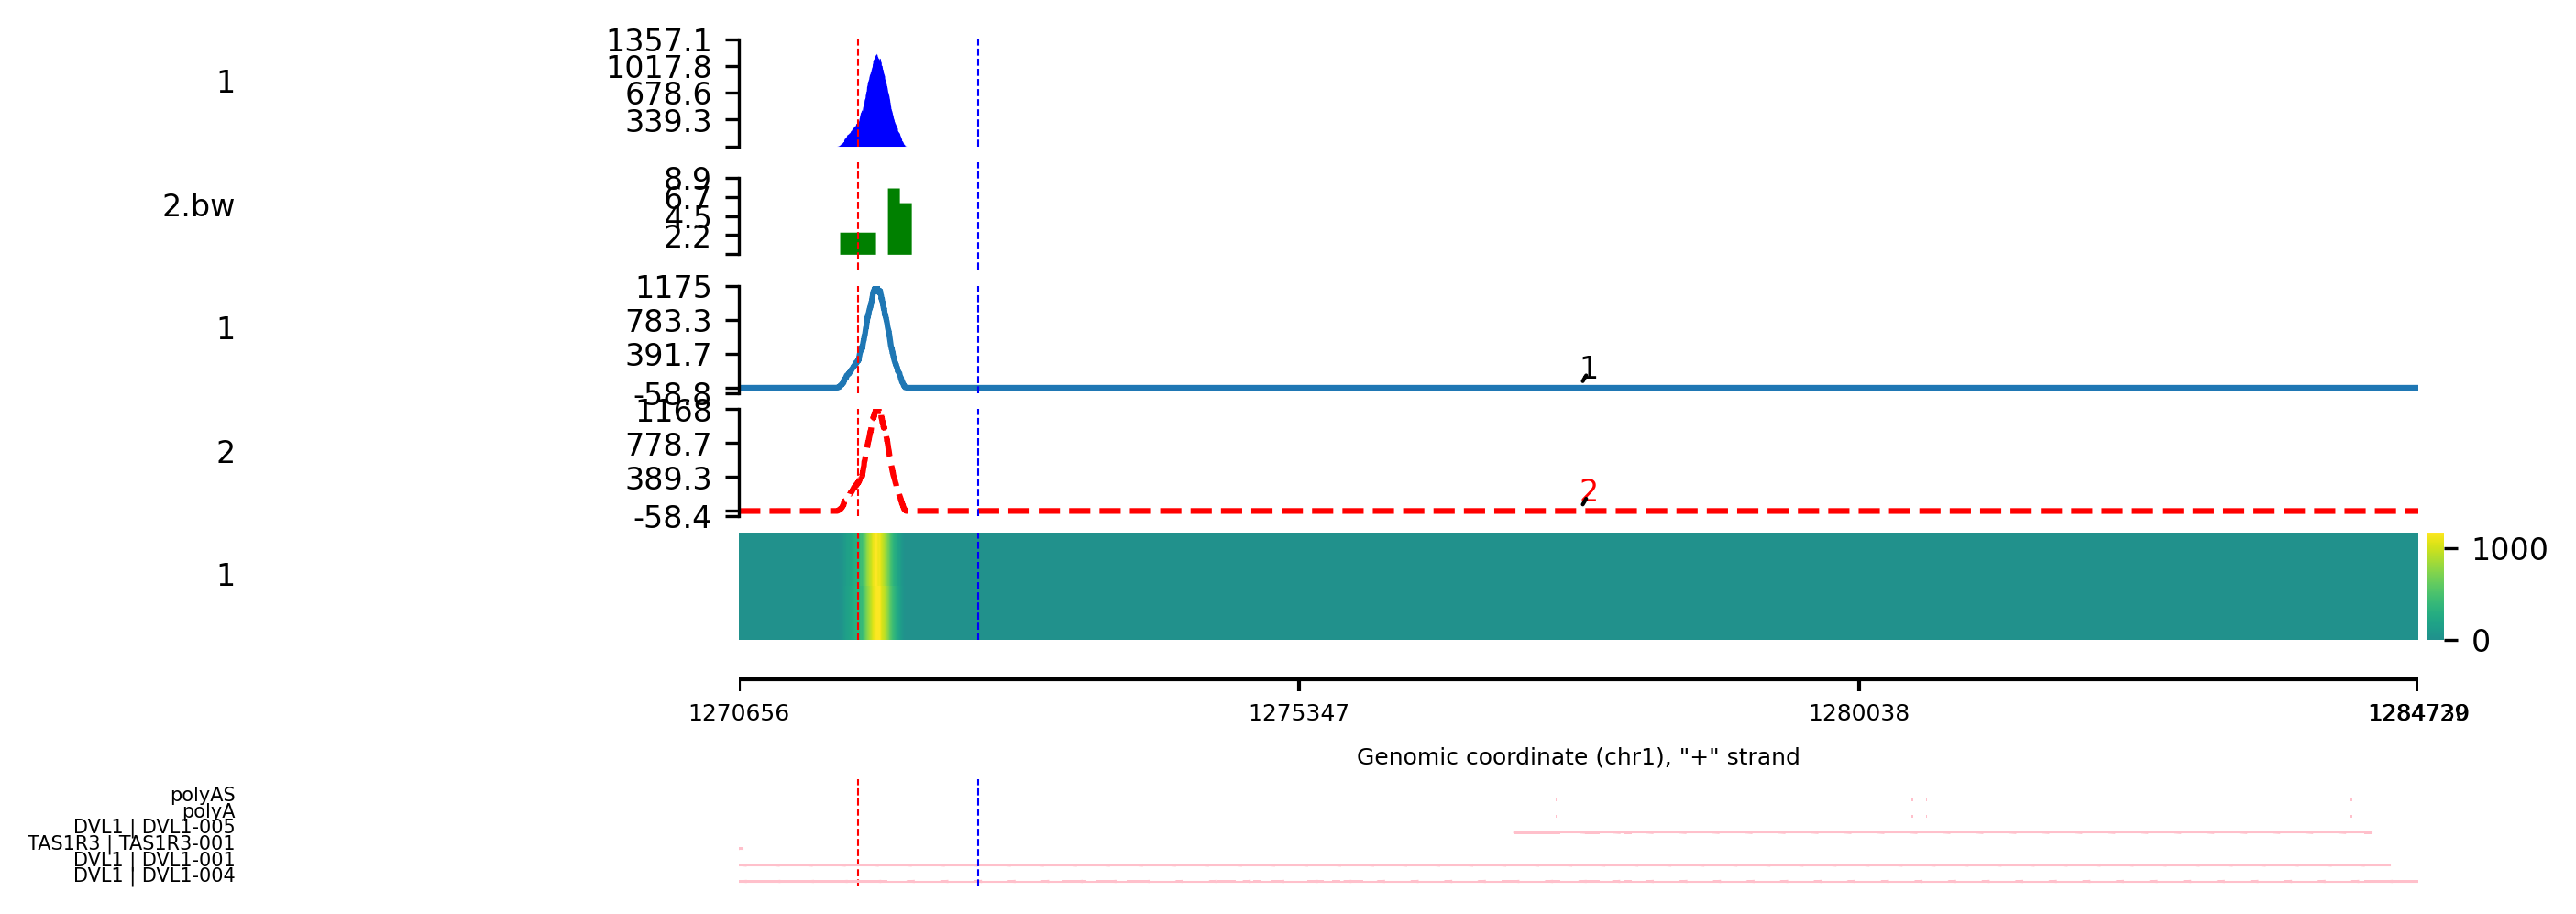

In [10]:
plot.add_sites(
    1270656 + 1000                                                                            # the highlight site
).add_sites(
    1270656 + 1000                                                                            # the repeat highlight site will show in different color with normal highlight site
).add_sites(
    1270656 + 2000
)

plot.plot(
    threshold=10,
    height=5
)


### Add a focus regons

User could also highlight the regions

2023-02-15 16:13:49.314 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:49.321 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:49.324 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:49.326 | INFO     | sashimi.plot:plot:1015 - load data of 5 plots
2023-02-15 16:13:51.910 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=8; n_cols = 2
2023-02-15 16:13:51.910 | INFO     | sashimi.plot:plot:1055 - init graph_coords
2023-02-15 16:13:51.911 | WARNING  | sashimi.plot:plot:1059 - heatmap require intron_scale = 1


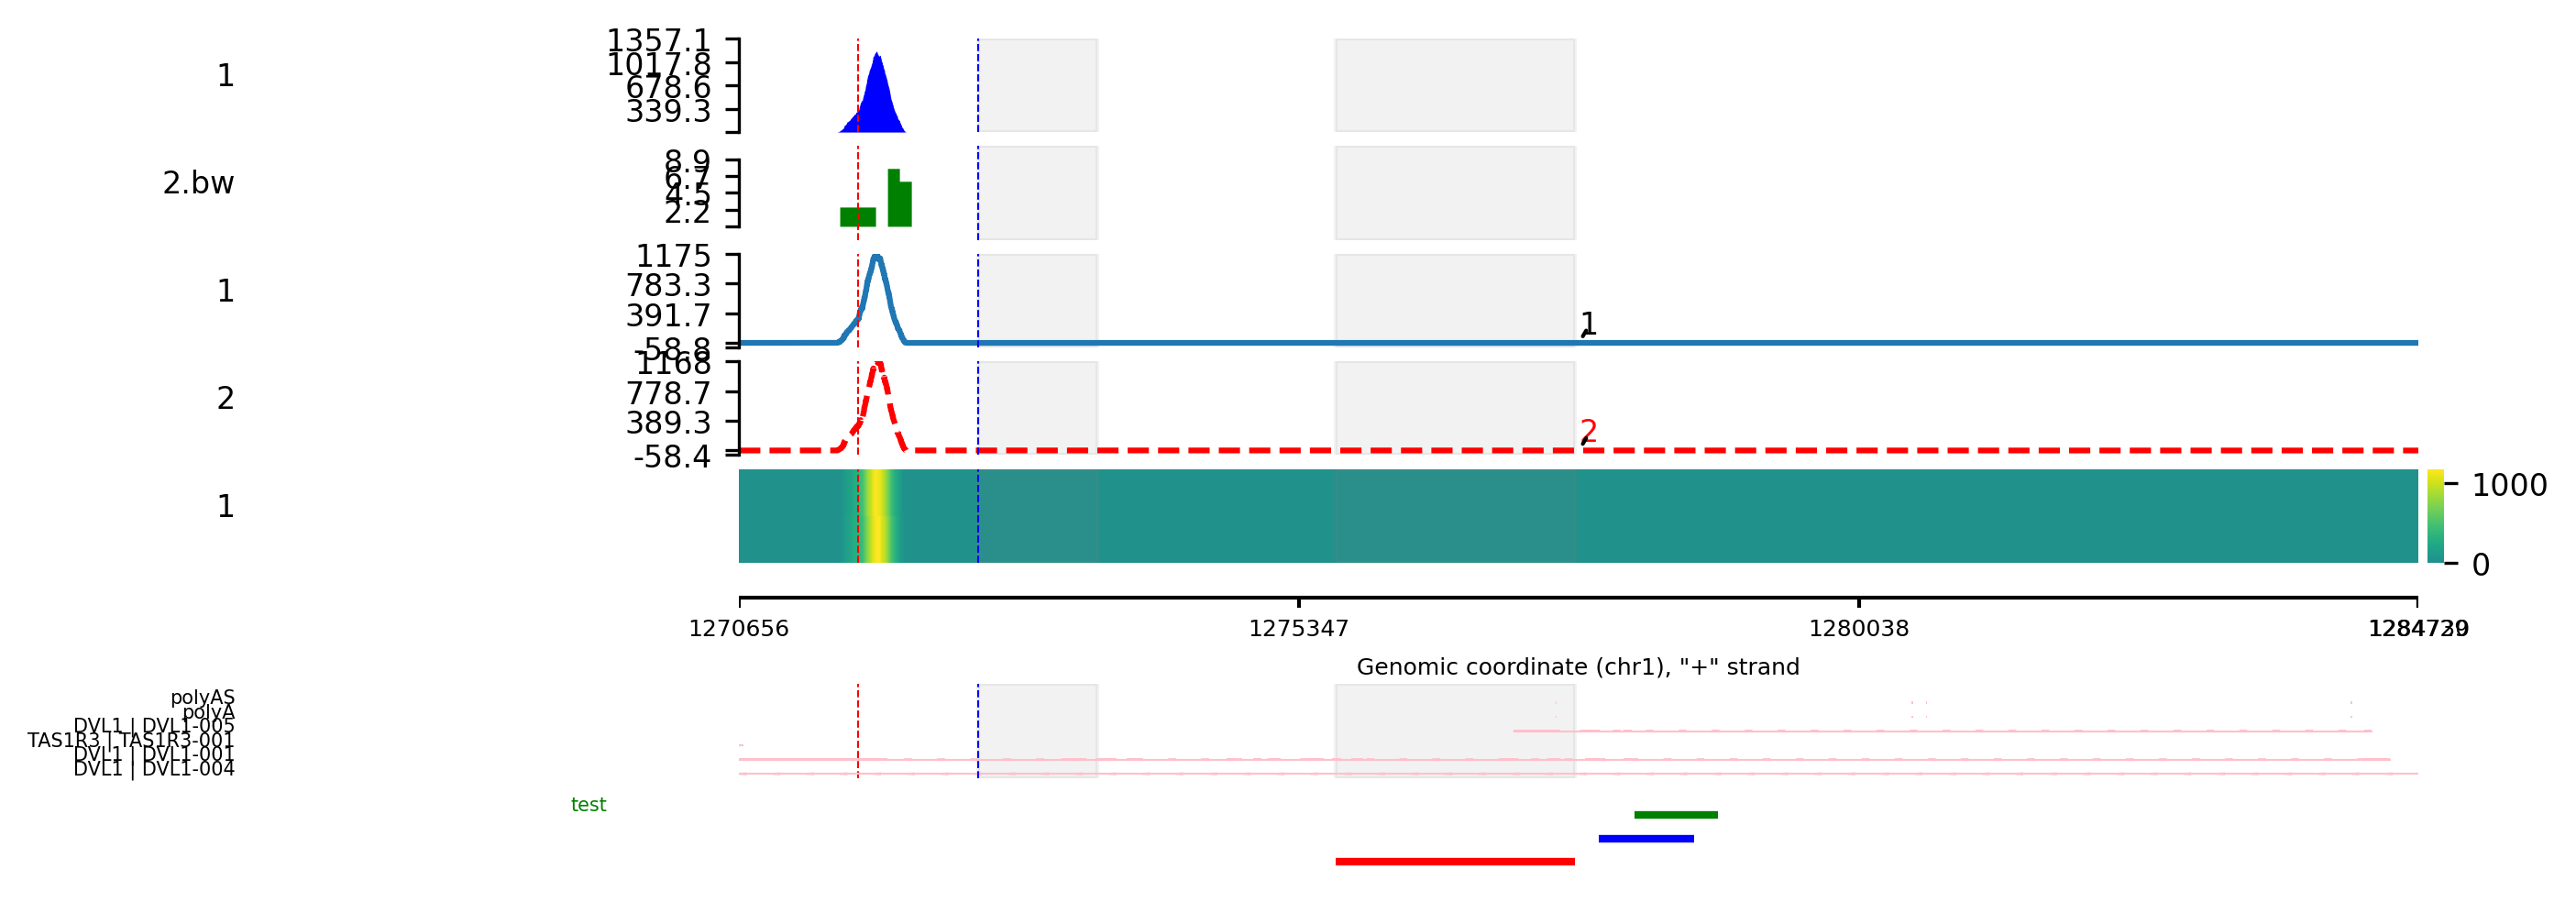

In [11]:
plot.add_focus(
    f"{1270656 + 2000}-{1270656 + 3000}"                                                      # the focus region in start_site-end_site format
).add_focus(
    f"{1270656 + 5000}-{1270656 + 7000}"
).add_stroke(
    f"{1270656 + 5000}-{1270656 + 7000}:{1270656 + 7200}-{1270656 + 8000}@blue"               # the stroke in start_site-end_site:start_site-end_site@color format, this will add 2 strokes and the last on will be blue
).add_stroke(                                                                                 # add stroke with named parameters
    start=1270656 + 7500,                                                                     # the start site of added stroke
    end=1270656 + 8200,                                                                       # the end site of added stroke
    color="green",                                                                            # the color of added stroke
    label="test"                                                                              # the label of added stroke
)

plot.plot(
    threshold=10,
    width=20
)


#### Add a read-by-read plot track

User could pass bam or bed12 format into the tool to generate the read-by-read plot

In [12]:
matplotlib.rcParams['figure.figsize'] = [10, 115]
plot.add_igv(
    path="../example/bams/3.bam",                                                             # path to input file
    features={
        "m6a": "ma",                                                                          # the tag recorded the m6a modification site
        "real_strand": "rs",                                                                  # the tag recorded the strand information
        "polya": "pa"                                                                         # the tag recorded the polyA length information
    },
    category="igv",                                                                           # the category of given file
    label="igv"                                                                               # the label of this plot
).add_igv(
    path="../example/SRX9697989.corrected_reads.bed.gz",
    category="igv",
    label="bed12"
)

plot.plot(
    threshold=10
)


2023-02-15 16:13:53.181 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:13:53.187 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:53.191 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:53.192 | INFO     | sashimi.plot:plot:1015 - load data of 7 plots
2023-02-15 16:13:55.997 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:13:55.999 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=65; n_cols = 2
2023-02-15 16:13:56.000 | INFO     | sashimi.plot:plot:1055 - init graph_coords
2023-02-15 16:13:56.000 | WARNING  | sashimi.plot:plot:1059 - heatmap require intron_scale = 1


## 4. save figures

In [13]:
plot.plot(
    "test_plot.png",
    width=6,                                   # the width of plot
    height=1,                                  # the height of single plot, normally the height huge igv plot will automaticlly extended
    raster=True
)

# save plot into test_plot.png (pdf and svg also supported), with given width and height, the raster=True, will reduce layers in pdf or svg format

2023-02-15 16:14:02.742 | INFO     | sashimi.plot:plot:1001 - load reference
2023-02-15 16:14:02.748 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:14:02.752 | INFO     | sashimi.base.Readder:__modify_chrom__:90 - Guess 'chr' is redundant
2023-02-15 16:14:02.753 | INFO     | sashimi.plot:plot:1015 - load data of 7 plots
2023-02-15 16:14:05.400 | DEBUG    | sashimi.plot:plot:1054 - plots n_rows=65; n_cols = 2
2023-02-15 16:14:05.401 | INFO     | sashimi.plot:plot:1055 - init graph_coords
2023-02-15 16:14:05.401 | WARNING  | sashimi.plot:plot:1059 - heatmap require intron_scale = 1
